Frisch-Waugh-Lovell ([FWL](https://en.wikipedia.org/wiki/Frisch%E2%80%93Waugh%E2%80%93Lovell_theorem)) Theorem

The FWL theorem shows how to handle a non-randomized experiment where the treatment is affected by a confounding variable. For example, consider the outcome being defaults, the treatment being credit limits, and income as a confounder. Income affects both the likelihood of defaults and the credit limits assigned to individuals (income can serve as a proxy for credit risk). The problem is that defaults might appear to go up as credit limits go down, but this could be due to the confounding effect of income, not the credit limits themselves. Holding income constant, we might expect that higher credit limits could lead to more defaults because individuals have more money available to get into debt.

To properly estimate the effect of credit limits on defaults while accounting for the confounding influence of income, we use the FWL theorem as follows:

1. Regress the outcome (defaults) on the confounder (income) to remove the confounding influence. The residuals from this regression represent the variation in defaults that cannot be explained by income.
2. Regress the treatment (credit limits) on the confounder (income) to remove the confounding influence from the treatment. The residuals from this regression represent the variation in credit limits that is not explained by income.
3. Regress the residuals of the outcome on the residuals of the treatment. This step isolates the effect of credit limits on defaults, controlling for income. The coefficient obtained here is the causal effect of credit limits on defaults, independent of income.

From some Chatgpt convos

In [91]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulate data
n = 1000
confounder = np.random.normal(50,10,n) # Confounder (e.g. income)
treatment = 0.5*confounder + np.random.normal(0,5,n) # Treatment (not random, depends on confounder, e.g. credit limit affected by income)
outcome = 2*treatment - 4*confounder + np.random.normal(0,10,n) # Outcome (depends on treatment and confounder, e.g. default rates)

In [92]:
# Frisch-Waugh-Lovell (FWL) Theorem

# Step 1: Regress outcome on confounder to remove confounding influence
X_confounder = sm.add_constant(confounder)
model_confounder = sm.OLS(outcome, X_confounder).fit()
outcome_residuals = model_confounder.resid

# Step 2: Regress treatment on confounder to remove the confounding influence
model_treatment_confounder = sm.OLS(treatment, X_confounder).fit()
treatment_residuals = model_treatment_confounder.resid

# Step 3: Regress the residuals of the outcome on the residuals of the treatment
model_fwl = sm.OLS(outcome_residuals, treatment_residuals).fit() # This isolates the treatment effect, controlling for confounder.

# Full regression without FWL
X_full = sm.add_constant(np.column_stack([treatment, confounder]))
model_full = sm.OLS(outcome, X_full).fit()

In [93]:
## see how effect is very close to 2 and stat sig
print("FWL Regression (controlling for confounder):")
print("")
print(model_fwl.summary())

FWL Regression (controlling for confounder):

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squares   F-statistic:                              1006.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):                   2.82e-153
Time:                        01:46:27   Log-Likelihood:                         -3704.0
No. Observations:                1000   AIC:                                      7410.
Df Residuals:                     999   BIC:                                      7415.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

In [94]:
print("Full Regression (including confounder directly):")
print("")
print(model_full.summary())

Full Regression (including confounder directly):

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     5009.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:46:28   Log-Likelihood:                -3704.0
No. Observations:                1000   AIC:                             7414.
Df Residuals:                     997   BIC:                             7429.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

FWL: Controlling for a confounder via regression is mathematically equivalent to subtracting out the portion of the variation that can be explained by the confounder and then performing the regression on what's left.

Thus, the FWL procedure yields the same treatment coefficient because it isolates the effect of the treatment in the same way the full regression does. Both methods control for the confounder, ensuring that the coefficient on the treatment represents the causal effect of the treatment, independent of the confounder.

<!-- ## chatgpt prompt:
Give me python code for a simple example of the power of the fwl theory on causal inference where the treatment is not random, but we can reduce the effect by making it more random by regression for confounding variables.
 -->


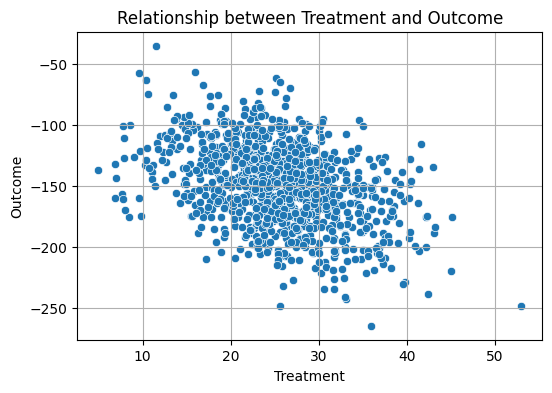

In [95]:
# Plot 1: Relationship between Treatment and Outcome
# You see that the treatment appears to have a strong effect.
plt.figure(figsize=(6, 4))
sns.scatterplot(x=treatment, y=outcome)
plt.title('Relationship between Treatment and Outcome')
plt.xlabel('Treatment')
plt.ylabel('Outcome')
plt.grid(True)
plt.show()

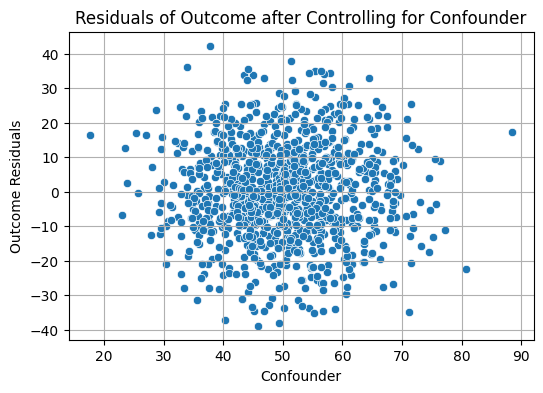

In [96]:
#The residuals represent what is left in the outcome after controlling for the confounder.

# Plot 2: Residuals of Outcome after controlling for Confounder
plt.figure(figsize=(6, 4))
sns.scatterplot(x=confounder, y=outcome_residuals)
plt.title('Residuals of Outcome after Controlling for Confounder')
plt.xlabel('Confounder')
plt.ylabel('Outcome Residuals')
plt.grid(True)
plt.show()

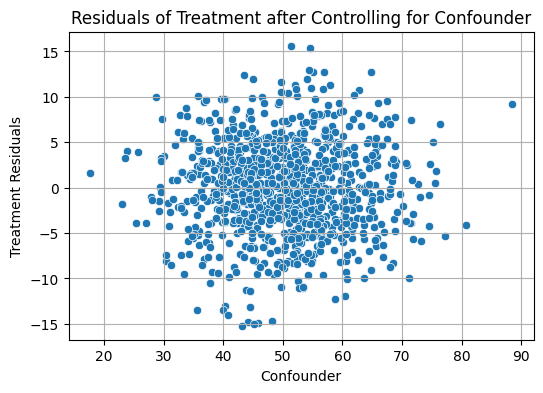

In [97]:
# The residuals represent the portion of the treatment that is orthogonal to the confounder, making it closer to random.

# Plot 3: Residuals of Treatment after controlling for Confounder
plt.figure(figsize=(6, 4))
sns.scatterplot(x=confounder, y=treatment_residuals)
plt.title('Residuals of Treatment after Controlling for Confounder')
plt.xlabel('Confounder')
plt.ylabel('Treatment Residuals')
plt.grid(True)
plt.show()

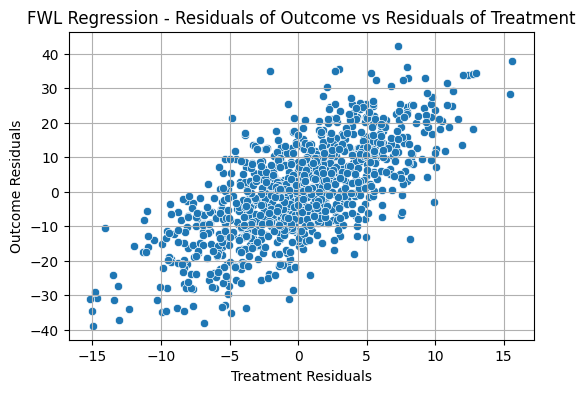

In [98]:
#This plot isolates the causal effect of the treatment after controlling for the confounder (notice the scale change)
# Plot 4: FWL Regression - Residuals of Outcome vs Residuals of Treatment
plt.figure(figsize=(6, 4))
sns.scatterplot(x=treatment_residuals, y=outcome_residuals)
plt.title('FWL Regression - Residuals of Outcome vs Residuals of Treatment')
plt.xlabel('Treatment Residuals')
plt.ylabel('Outcome Residuals')
plt.grid(True)
plt.show()